# Pandas

Chart Visualization:
https://pandas.pydata.org/docs/user_guide/visualization.html#scatter-plot

In [1]:
import pandas as pd
import numpy as np

<img src="Visualization-in-Pandas.jpg" width="600">

## Line

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

In [3]:
ts.head()

2000-01-01    2.190298
2000-01-02    1.937145
2000-01-03    2.325940
2000-01-04    2.927167
2000-01-05    4.318123
Freq: D, dtype: float64

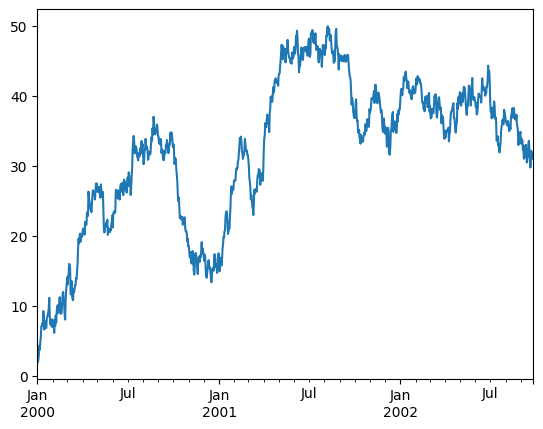

In [4]:
ts.plot();

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()

In [6]:
df.head()

,A,B,C,D
2000-01-01,-0.692175,1.005105,-0.350540,0.265943
2000-01-02,-2.018297,1.947237,0.954061,0.041845
2000-01-03,-2.081556,3.768025,0.753000,1.304456
2000-01-04,-2.241645,5.162454,0.013338,3.840857
2000-01-05,-1.864442,5.464553,1.131732,3.706284


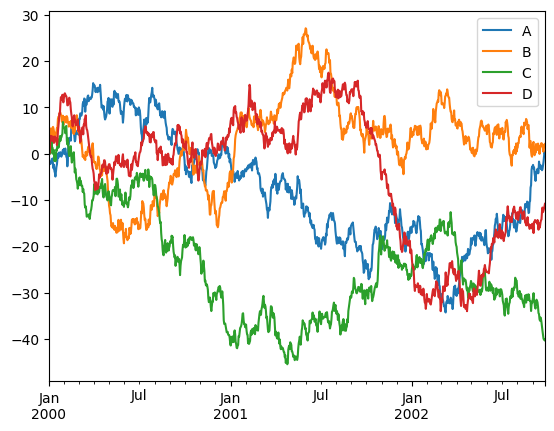

In [7]:
df.plot();

## Bar plots

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')

In [9]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [10]:
female_wage = df.groupby('female')['wage'].mean()
female_wage

female
0    7.368823
1    4.299358
Name: wage, dtype: float64

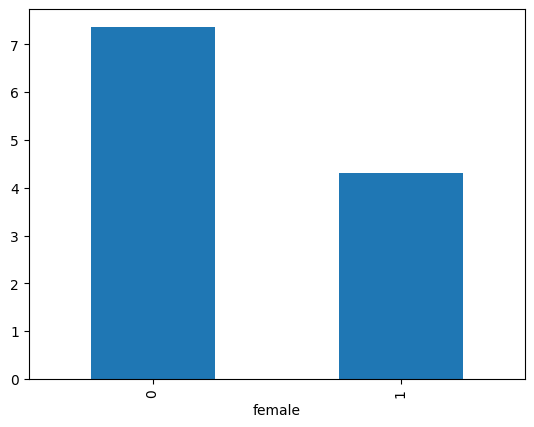

In [11]:
female_wage.plot(kind='bar');

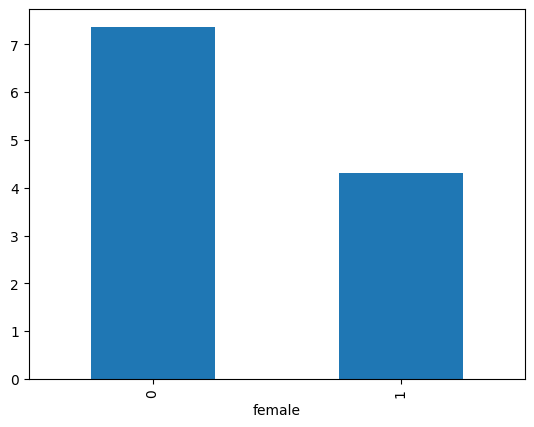

In [12]:
female_wage.plot.bar();

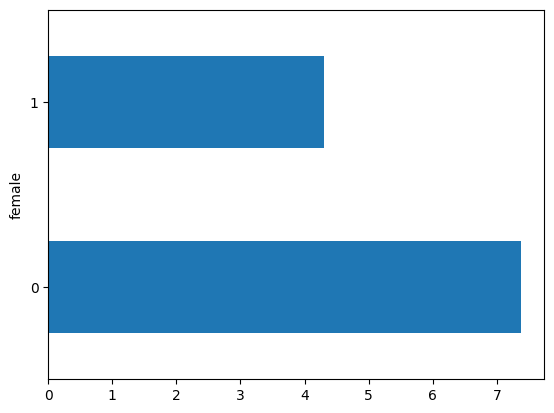

In [13]:
female_wage.plot.barh();

In [14]:
looks_wage = df.groupby(['female','looks'])['wage'].mean()
looks_wage

female  looks
0       1        6.163750
        2        6.249091
        3        7.598957
        4        7.226447
        5        9.923636
1       1        2.154000
        2        3.829074
        3        4.207854
        4        4.745074
        5        3.902500
Name: wage, dtype: float64

In [15]:
looks_wage = looks_wage.unstack()
looks_wage

looks,1,2,3,4,5
female,,,,,
0,6.16375,6.249091,7.598957,7.226447,9.923636
1,2.15400,3.829074,4.207854,4.745074,3.902500


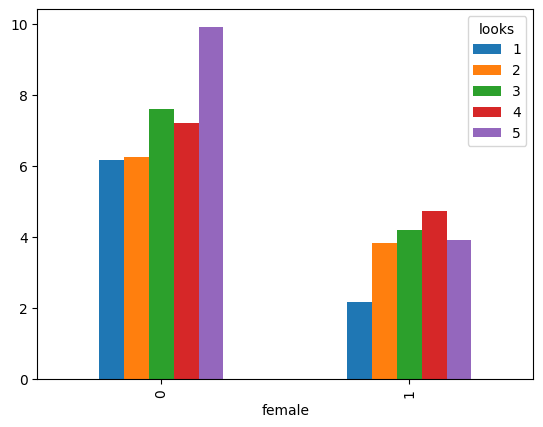

In [16]:
looks_wage.plot.bar();

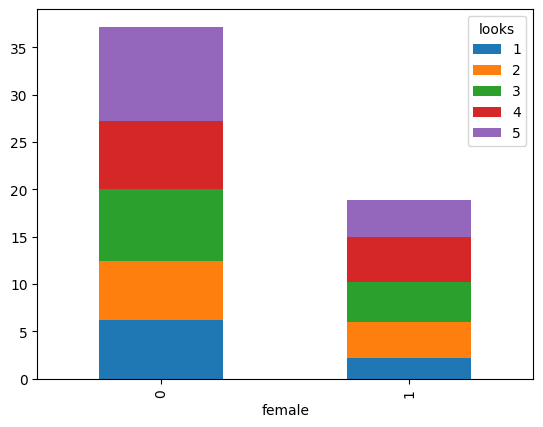

In [17]:
looks_wage.plot.bar(stacked=True);

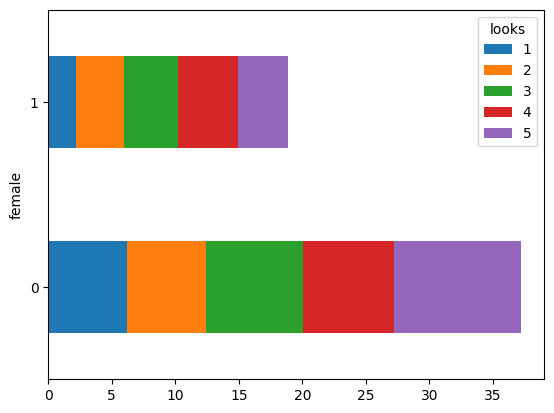

In [18]:
looks_wage.plot.barh(stacked=True);

## Histograms

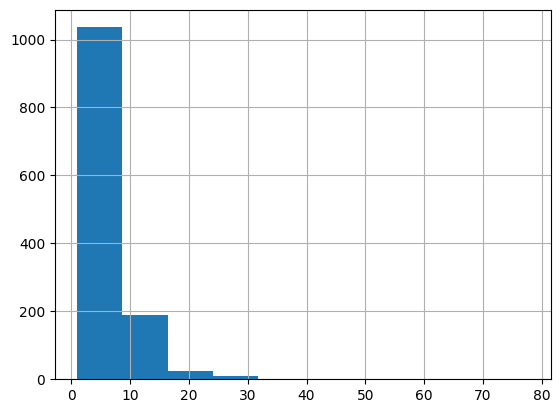

In [19]:
df['wage'].hist();

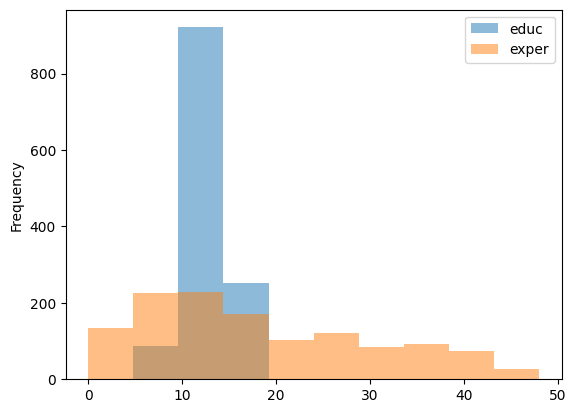

In [20]:
df[['educ', 'exper']].plot.hist(alpha=0.5);

## Box plot

In [21]:
#exper_educ = df.groupby(['exper', 'educ'])['wage'].mean().unstack()

In [22]:
#exper_educ

In [23]:
#exper_educ.plot.box();

In [24]:
educ_wage = df.groupby([df.index, 'educ'])['wage'].mean().unstack()

In [25]:
educ_wage

educ,5,8,10,12,13,14,16,17
0,NaN,NaN,NaN,NaN,NaN,5.73,NaN,NaN
1,NaN,NaN,NaN,4.28,NaN,NaN,NaN,NaN
2,NaN,NaN,7.96,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,11.57,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,11.42,NaN
...,...,...,...,...,...,...,...,...
1255,NaN,NaN,NaN,1.61,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,1.68,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,3.29,NaN,NaN,NaN,NaN
1258,NaN,NaN,2.31,NaN,NaN,NaN,NaN,NaN


<img src="https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png" width="600">

<Axes: >

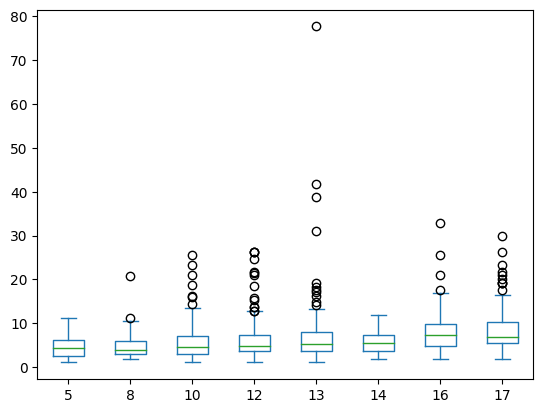

In [26]:
educ_wage.plot.box()

<Axes: >

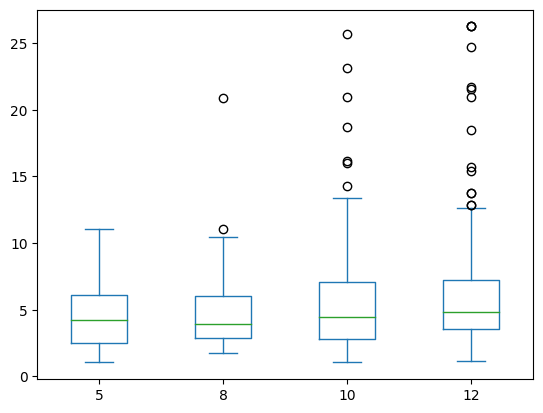

In [27]:
educ_wage.iloc[:,:4].plot.box()

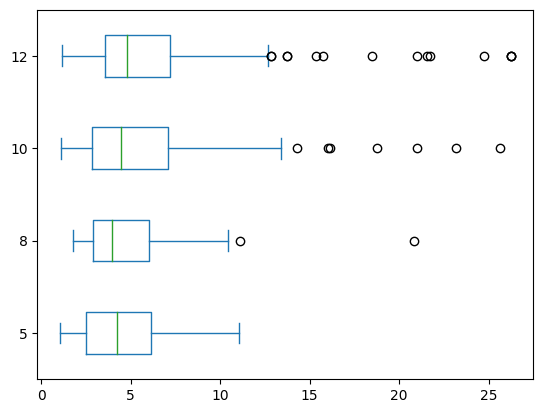

In [28]:
educ_wage.iloc[:,:4].plot.box(vert=False);

## Area plot

In [29]:
educ_looks = df.groupby(['educ','looks'])['wage'].mean().unstack()
educ_looks

looks,1,2,3,4,5
educ,,,,,
5,2.320,4.488750,4.781739,5.360000,NaN
8,2.730,4.231250,4.857308,6.196667,NaN
10,NaN,5.109048,5.811081,4.564348,4.490000
12,6.502,4.774082,6.124569,5.206232,5.177778
13,3.605,5.511481,6.704627,6.871875,9.966667
14,NaN,3.965714,6.390400,5.212222,4.950000
16,8.350,7.253333,7.828767,8.015128,3.475000
17,NaN,7.851250,8.731429,8.401400,15.830000


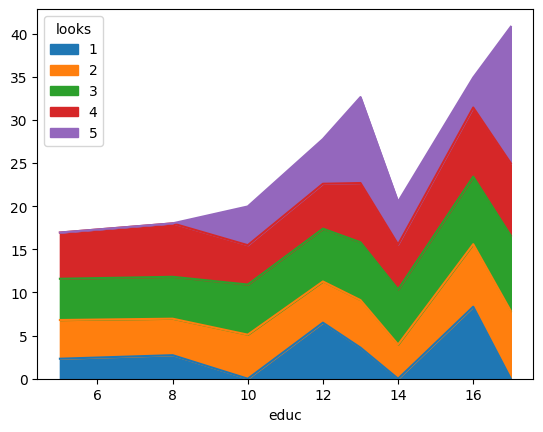

In [30]:
educ_looks.plot.area();

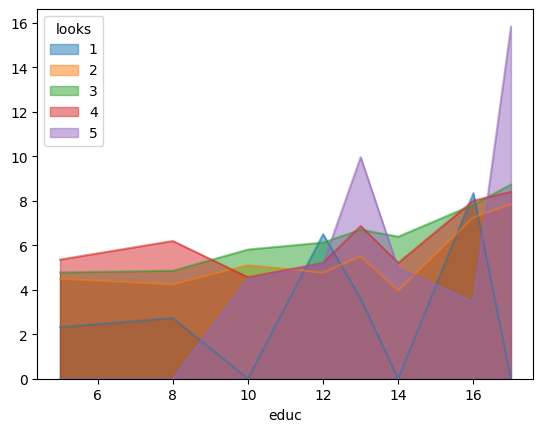

In [31]:
educ_looks.plot.area(stacked=False);

## Scatter plot

In [32]:
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


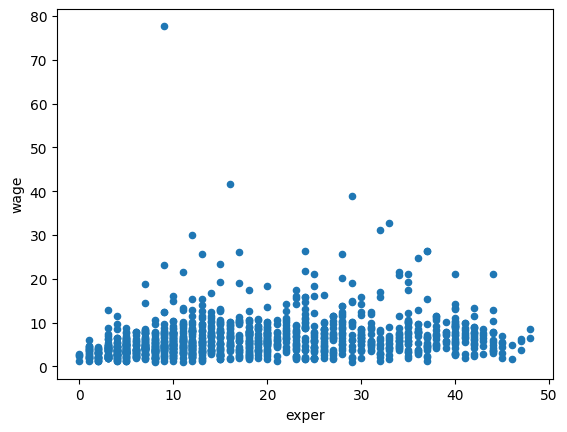

In [33]:
df.plot.scatter(x='exper', y='wage');

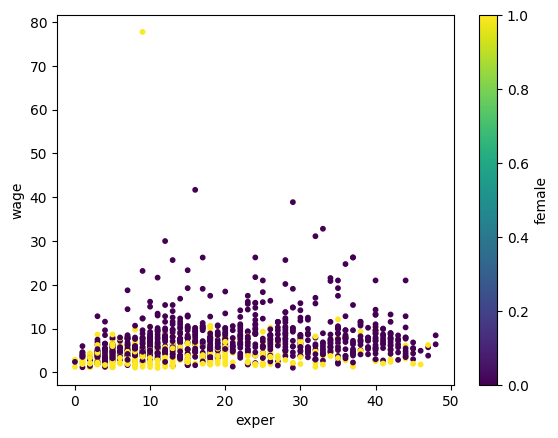

In [34]:
df.plot.scatter(x='exper', y='wage', c='female', cmap="viridis", s=10);

## Pie plot

In [35]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

In [36]:
series

a    2.040886
b    1.863313
c    0.946962
d    1.266416
Name: series, dtype: float64

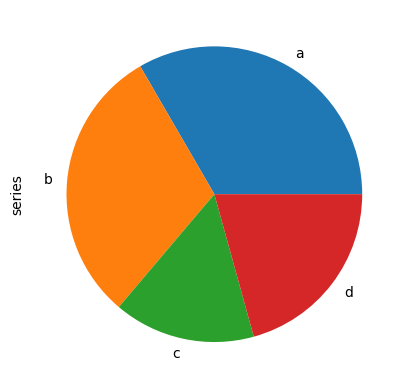

In [37]:
series.plot.pie();

In [38]:
looks_count = df['looks'].value_counts()

In [39]:
looks_count

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

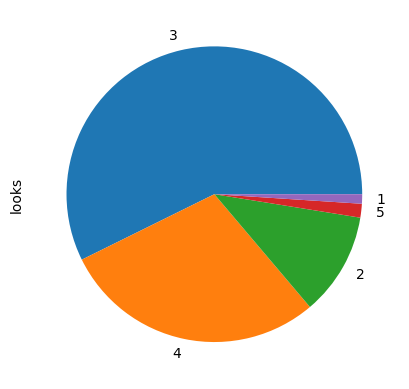

In [40]:
looks_count.plot.pie();

## Pandas_profiling

# Новый раздел

In [41]:
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [44]:
!pip install pandas-profiling[notebook]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py

In [46]:
import pandas_profiling

In [45]:
from pandas_profiling import ProfileReport


profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("my_report.html")

<ipython-input-45-dd25937ad8b9>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]